In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [37]:
df = pd.read_csv('../data/image_analysis/엄마웃기3회.csv')
with open('../data/image_analysis/emotion_rule.json', 'r') as f:
    emotion = json.load(f)

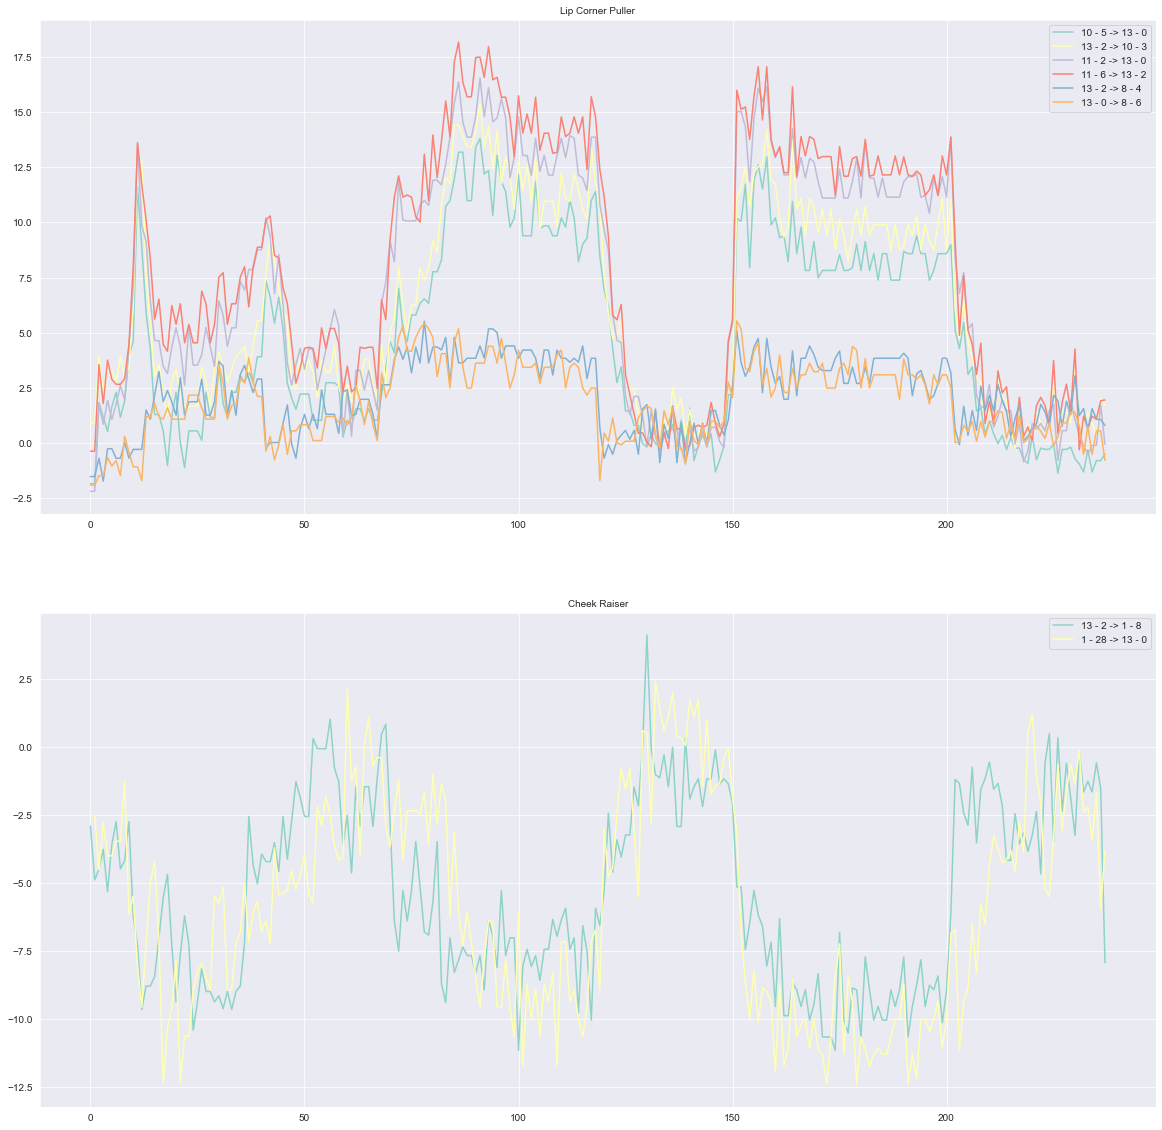

In [38]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(len(emotion['Happy']), 1, figsize = (20,20))
for idx in range(len(emotion['Happy'])):
    target_list = [i[0].replace('-',' - ') + " -> " + i[1].replace('-', ' - ') for i in emotion['Happy'][idx]['landmark_pair']]
    temp_plot = sns.lineplot(data = df[target_list], markers=False, dashes=False, ax=ax[idx])
    temp_plot.set_title(emotion['Happy'][idx]['name'], size='10')